# Classification

## Student studying time (Binary classification)

A group of 20 students spend between 0 and 6 hours studying for an exam. How does the number of hours spent studying affect the probability of the student passing the exam?

The reason for using logistic regression for this problem is that the values of the dependent variable are pass and fail, represented by "1" and "0".
If the problem was changed so that pass/fail was replaced with the grade 0–100 (cardinal numbers), then simple regression analysis could be used.

The dataset:

| Hours | 0.50 | 0.75 | 1.00 | 1.25 | 1.50 | 1.75 | 1.75 | 2.00 | 2.25 | 2.50 | 2.75 | 3.00 | 3.25 | 3.50 | 4.00 | 4.25 | 4.50 | 4.75 | 5.00 | 5.50 | 
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Pass | 0 | 0 | 0 | 0 | 0 | 0 | 1 | 0 | 1 | 0 | 1 | 0 | 1 | 0 | 1 | 1 | 1 | 1 | 1 | 1 | 

Hours are given in h. If the student passed it gets 1, else 0.

First separate the data into a training and a test dataset.

In [1]:
import pandas as pd
pd.set_option("display.max_rows", 16)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Hours=np.array([0.5,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50]).reshape(-1, 1)
Pass=np.array([0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1]).reshape(-1, )

x_train, x_test, y_train, y_test = train_test_split(Hours, Pass, test_size=0.25, random_state=0)

### LogisticRegression module from sklearn

`LogisticRegression()` is a Python class that is constructed similarly to `LinearRegression()`. It has some options `LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)`:
- *penaly* and *dual*. Used to specify the way penalization is done- Leave it as is.
- *tol* Tolerance for stopping criteria. May be changed to improve accuracy, but might cost computation time.
- *C* Inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization. Results are more regular.
- *fit_intercept* is allowing or not the computation of $\theta_0$, if False $\theta_0=0$.
- *intercept_scaling* - Leave it as is.
- *class_weight* Allows you to provide a dict of the weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. (Not useful for binary classification)
- *random_state* - Leave it as is.
- *solver* allows you to specify the use of a particular solver. In most cases, leave it as is. If needed, check the scikit-learn documentation.
- *max_iter* specifies a maximum number of iteration, after which the algorithm stops.
- *multi_class* - Leave it as is.
- *verbose* Specify a number to get information about the current progress of the regression algorithm.
- *warm_start* When set to True, reuse the solution of the previous call to fit as initialization, otherwise, just erase the previous solution. Useless for liblinear solver.
- *n_jobs* Number of threads used when parallelizing over classes if multi_class=’ovr’”. This parameter is ignored when the solver is set to ‘liblinear’ regardless of whether ‘multi_class’ is specified or not. None means 1 and -1 means using all processors.
- *l1_ratio* - Leave it as is.

In [2]:
logisticRegr = LogisticRegression()

### LogisticRegression methods and attributes

The LogisticRegression() class has access to the same methods/attributes as LinearRegression():
- *.fit()* trains the model and computes the coefficient and intercept values
- *.predict()* allows to predict a value from the model
- *.coef_* gives you the coefficient found
- *.intercept_* gives you the intercept value

Additionnaly, you get access to the following functions:
- *predict_proba(X)* Probability of X being in one class
- *score(X, y)* Return the mean accuracy on the given test data and labels.

In [3]:
logisticRegr.fit(x_train, y_train)

y_pred = logisticRegr.predict(x_test)

# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(f'Accuracy of the model: {score*100} %')


Accuracy of the model: 60.0 %


To visualize the model we have to convert the obtained coefficient into a sigmoid function:

$\Large \sigma (X) = \frac{1}{1+e^{- ( X* \Theta_0 + \beta )}}$

With:
- $\Theta_0$ the coefficient
- $\beta$ the intercept

There can be more than one coefficient if X is made with more than one input. For example, there can be two inputs vectors/columns/independent variables.
In this case the function becomes:

$\Large \sigma (X) = \frac{1}{1+e^{- ( X_1 * \Theta_1 +  X_2 * \Theta_2 + \beta )}}$

With:
- $ X_1, X_2$ the two input vectors
- $\Theta_1, \Theta_2 $ the two coefficients
- $\beta$ the intercept

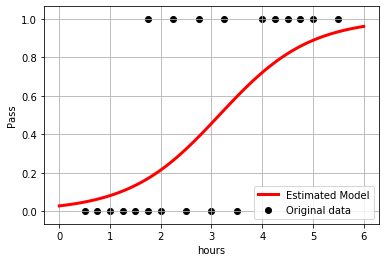

Coefficient of the logistic regression: 1.12 Intercept of the logistic regression: -3.547593039025236


In [4]:
plt.scatter(np.append(x_train,x_test), np.append(y_train,y_test),  color='black', label="Original data")

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Sigmoid_x = np.linspace(0, 6, 100)
loss = sigmoid(Sigmoid_x * logisticRegr.coef_ + logisticRegr.intercept_).ravel()
plt.plot(Sigmoid_x, loss, color='red', linewidth=3, label="Estimated Model")
plt.legend()
plt.grid()
plt.xlabel('hours')
plt.ylabel('Pass')
plt.show()

print('Coefficient of the logistic regression: ' + str(round(logisticRegr.coef_[0][0],2)) + ' Intercept of the logistic regression: '+ str(logisticRegr.intercept_[0]))

### Changing input dataset

Changing the input dataset moves the position of the estimated model. Try it.

1.0


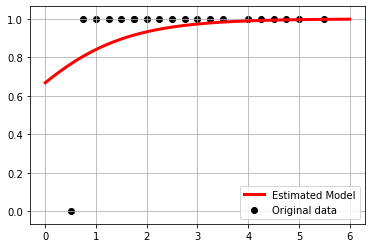

In [5]:
Pass=np.array([0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]).reshape(-1, )

def LogisticRegStudy(X,Y):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

    logisticRegr = LogisticRegression()

    logisticRegr.fit(x_train, y_train)

    y_pred = logisticRegr.predict(x_test)

    # Use score method to get accuracy of model
    score = logisticRegr.score(x_test, y_test)
    print(score)

    plt.scatter(np.append(x_train,x_test), np.append(y_train,y_test),  color='black', label="Original data")

    Sigmoid_x = np.linspace(0, 6, 100)
    loss = sigmoid(Sigmoid_x * logisticRegr.coef_ + logisticRegr.intercept_).ravel()
    plt.plot(Sigmoid_x, loss, color='red', linewidth=3, label="Estimated Model")
    plt.legend()
    plt.grid()
    plt.show()
    
LogisticRegStudy(Hours,Pass)

## Digits Dataset (An example of Multi-class classification from Michael Galarnyk)

This exercise comes from: https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below will load the digits dataset.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme (by default): the best predicted accuracy is the chosen output.

Image Data Shape (1797, 64)
Label Data Shape (1797,)


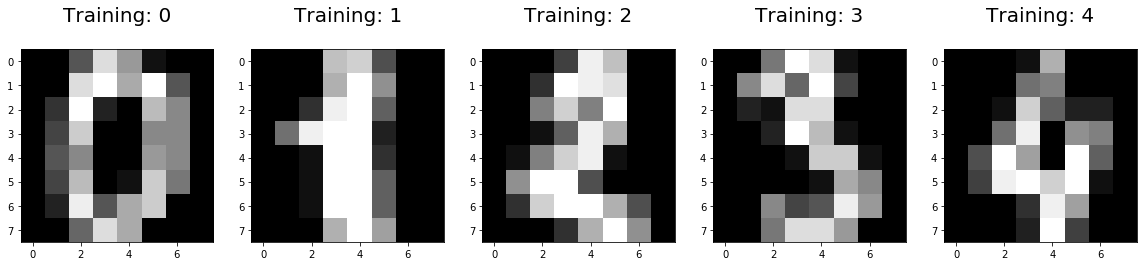

In [6]:
from sklearn.datasets import load_digits

# Loads the data
digits = load_digits()

# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

### Splitting Data into Training and Test Sets

In [7]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

### Scikit-learn 4-Step Modeling Pattern

**Step 1.** Import the model you want to use. In sklearn, all machine learning models are implemented as Python classes.

**Step 2.** Make an instance of the Model.

**Step 3.** Training the model on the data, storing the information learned from the data. Model is learning the relationship between x (digits) and y (labels).

**Step 4.** Predict the labels of new data (new images). Uses the information the model learned during the model training process.

In [18]:
#Step 1
from sklearn.linear_model import LogisticRegression

#Step 2 
logisticRegr2 = LogisticRegression(max_iter=100)

#Step 3
logisticRegr2.fit(x_train, y_train)

C:\Users\Nicolas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(10, 64)

Now that we have fit, we could have a look at all the computed coefficients, however this wouldn't be very useful as there are many many coefficient (one per pixel and per possible output)

Predictions are made for each number based on pixel data using following equation:

$\Large \sigma (X) = \frac{1}{1+e^{- ( X_1 \Theta_1 +  X_2 \Theta_2 + \,  \cdots \, + X_{64} \Theta_{64} + \beta_{Dig0} )}}$

With:
- $\Theta_1$ ... $\Theta_{64}$ The 64 coefficients for the first digit (0)
- $X_1$ ... $X_{64}$ The 64 pixel values
- $\beta_{Dig0}$ The intercept for the first digit

In [22]:
logisticRegr2.coef_.shape

(10, 64)

**Step 4.**

Predictions are obtained using the One vs Rest method. Which means that a certain probability is computed for each number (0,1,..,9) and the one that has the highest probability gets predicted.

In [19]:
#Step 4

# Returns a NumPy Array
# Predict for One Observation (image)
print(logisticRegr2.predict(x_test[0].reshape(1,-1)))

# Predict for Multiple Observations (images) at Once
print(logisticRegr2.predict(x_test[0:10]))

# Make predictions on entire test data
predictions = logisticRegr2.predict(x_test)

[2]
[2 8 2 6 6 7 1 9 8 5]


### Measuring Model Performance

While there are other ways of measuring model performance, we are going to keep this simple and use accuracy as our metric. 
To do this are going to see how the model performs on the new data (test set)

accuracy is defined as: 

(fraction of correct predictions): correct predictions / total number of data points

In [14]:
# Use score method to get accuracy of model
score = logisticRegr2.score(x_test, y_test)
print(f'Accuracy of the model: {score*100} %')

Accuracy of the model: 95.11111111111111 %


### Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

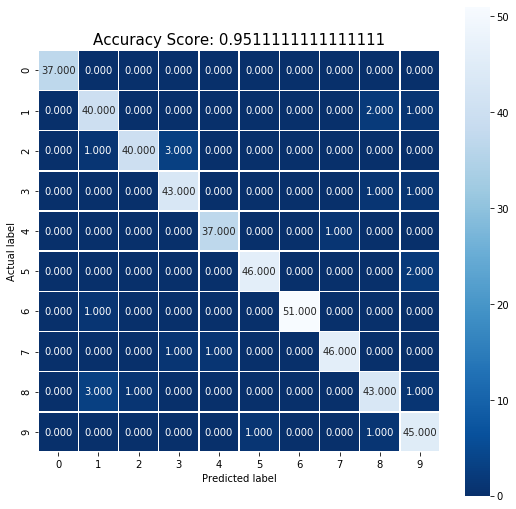

In [10]:
import numpy as np 

import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('toy_Digits_ConfusionSeabornCodementor.png')
plt.show();